In [2]:
#importing libraries 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from numpy import random
from scipy.integrate import quad

Part 1

In [3]:
#creating the function 
def f(x):
    return 10 + x**2 - 0.1*(x**3)

[210.  163.9 125.2  93.3  67.6  47.5  32.4  21.7  14.8  11.1  10.   10.9
  13.2  16.3  19.6  22.5  24.4  24.7  22.8  18.1  10. ]


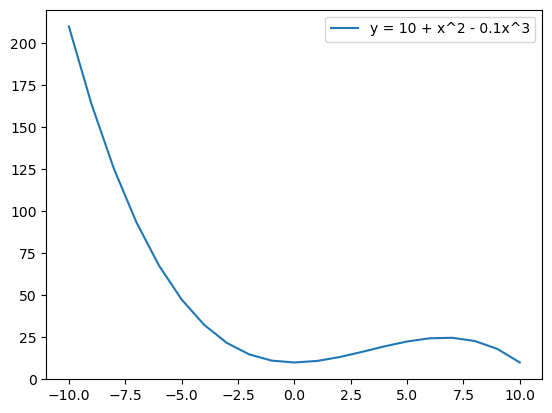

In [4]:
#plotting the graph of the original function 
x = np.arange(-10,11)
y = np.zeros(21)

#getting y values 
for i in range(21):
    y_point = f(x[i])   
    y[i] = y_point
print(y)

#plotting graph
plt.plot(x,y,label = "y = 10 + x^2 - 0.1x^3")
plt.legend()
plt.show()    

The area of Trapezium 1 is 98.996875

The area of Trapezium 2 is 87.47187500000001

The area of Trapezium 3 is 76.890625

The area of Trapezium 4 is 67.215625

The area of Trapezium 5 is 58.409375

The area of Trapezium 6 is 50.434375

The area of Trapezium 7 is 43.253125000000004

The area of Trapezium 8 is 36.828125

The area of Trapezium 9 is 31.121875

The area of Trapezium 10 is 26.096875

The area of Trapezium 11 is 21.715625

The area of Trapezium 12 is 17.940624999999997

The area of Trapezium 13 is 14.734375

The area of Trapezium 14 is 12.059375

The area of Trapezium 15 is 9.878125

The area of Trapezium 16 is 8.153125

The area of Trapezium 17 is 6.846875000000001

The area of Trapezium 18 is 5.921875

The area of Trapezium 19 is 5.340624999999999

The area of Trapezium 20 is 5.065625

The area of Trapezium 21 is 5.059375

The area of Trapezium 22 is 5.284375000000001

The area of Trapezium 23 is 5.703125

The area of Trapezium 24 is 6.278124999999999

The area of Trapezium

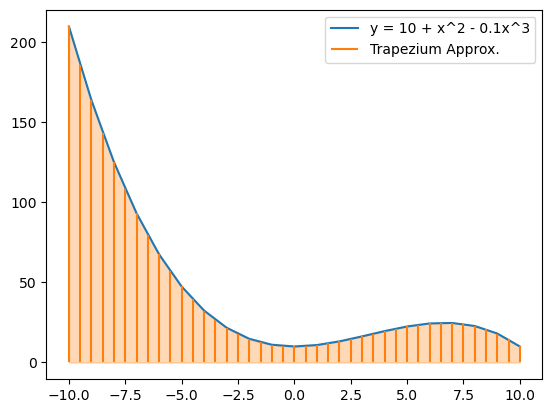

The area using integration is 866.6666666666665
Hence our approximation using 40 Trapeziums is differs by 0.8333333333334849


In [44]:
#using the trapezium rule 
#setting the number of each trapezium, the width of each trapezium and the starting x position 
n = 40
width = 20/n  #using rule: width = b-a/n
starting_x = -10


#getting the start/end points of each trapezium 
xpos = np.zeros(n+1) #x positions of each trapezium
heights = np.zeros(n+1) #heights/ y positions of each trapezium
xpos[-1] = 10 #sets the last x position to 10

#gets each x position by adding the width of each trapezium to the position of the last point
for i in range(n):
    xpos[i] = starting_x
    starting_x += width

    
#getting the height at each start/end point
for j in range(n+1):
    ypos = f(xpos[j])
    heights[j] = ypos


#getting the ares of each trapezium using the rule ((y0 + y1)/2)(x1-x0) and totals the area 
total = 0
areas = np.zeros(n)
for i in range(n):
    area = ((heights[i]+heights[i+1])/2)*(xpos[i+1]-xpos[i])
    areas[i] = area
    total += area
#     plt.fill_between([xpos[i], xpos[i+1]], [heights[i], heights[i+1]], alpha =0.3)
    
    

#outputting the area of each trapezium and the total area 
for i in range(n):
    print(f"The area of Trapezium {i+1} is {areas[i]}\n")
print(f"\nThe Total area of the aproximation using {n} trapeziums is {total}")


#plots the function 
plt.plot(x,y,label = "y = 10 + x^2 - 0.1x^3")

#plots vertical lines to make the trapeziums and fills in the space under the trapeziums 
plt.vlines(xpos,0,heights,color = "#ff7f0e", label = "Trapezium Approx.")
plt.fill_between(xpos,heights,0, color = "#ff7f0e", alpha = 0.3)


plt.legend()
plt.show()


#integrating to get the area and comparing 
f = lambda x: 10 + x**2 -0.1*x**3
integ = quad(f,-10,10)

print(f"The area using integration is {integ[0]}\nHence our approximation using {n} Trapeziums is differs by {abs(integ[0] - total)}")


Part 2

In [30]:
#crating a random number generator 
seed = 420
rng = random.default_rng(seed)

There are 1857 plots under the curve
The total area estimation using 9000 random plots is 866.6


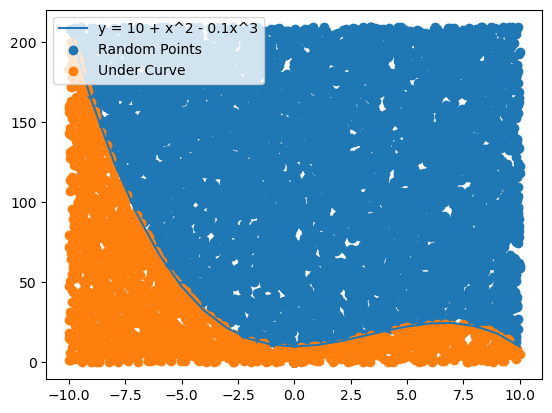

The area using integration is 866.6666666666665
Hence our approximation using 9000 plots differs by 0.06666666666649235


In [37]:
#declaring the number of points and the arrays to hold the plots 
n_points = 9000

#holds points above the line 
x_plots = np.zeros(n_points)
y_plots = np.zeros(n_points)

#holds points below the line 
x_under = np.zeros(n_points)
y_under = np.zeros(n_points)


#variable to store the total plots under the graph 
total_under = 0

#creates random x,y plots
for i in range(n_points):
    x_point = np.random.uniform(-10, 10)
    y_point = np.random.uniform(0, max(heights))

    #checks whether or not the plot is under the graph or not 
    #if it is under the graph adds one to the total number under the graph
    if y_point < f(x_point):
        x_under[i] = x_point
        y_under[i] = y_point 
        total_under += 1
    
    else:
        x_plots[i] = x_point 
        y_plots[i] = y_point

#calculates the total area of the plotting area 
total_area = (10--10)*max(heights)

#creates an estimate for the area 
area_estim = (total_under/n_points)*total_area

#plots the points and the gragh 
plt.plot(x,y,label = "y = 10 + x^2 - 0.1x^3")   
plt.scatter(x_plots,y_plots, label = "Random Points")
plt.scatter(x_under,y_under, label = "Under Curve")


print(f"There are {total_under} plots under the curve")
print(f"The total area estimation using {n_points} random plots is {area_estim}")

plt.legend()
plt.show()

print(f"The area using integration is {integ[0]}\nHence our approximation using {n_points} plots differs by {abs(integ[0] - area_estim)}")

Hence we can see that using Random Sampling gives us a far more accurate estimation of the area under a curve